Reference: https://github.com/scikit-learn-contrib/imbalanced-learn/blob/master/examples/plot_unbalanced_dataset.ipynb

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import itertools

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
#from imblearn.under_sampling import AllKNN

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalanceCascade

# Save a nice dark grey as a variable
almost_black = '#262626'


### Data generation

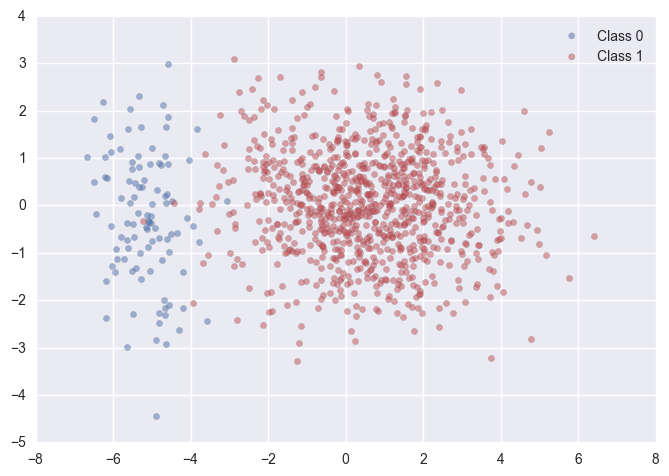

In [7]:
x, y = make_classification(n_classes = 2, class_sep = 2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=2016)

# Reducing dimensions for visualization purposes
pca = PCA(n_components = 2)
x_vis = pca.fit_transform(x)
palette = sns.color_palette()
plt.scatter(x_vis[y==0,0], x_vis[y==0,1], label="Class 0", alpha = 0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1,0], x_vis[y==1,1], label="Class 1", alpha = 0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
plt.legend()
plt.show()

#### Undersampling

In [12]:
verbose = False

# 'Random under-sampling'
US = RandomUnderSampler()
usx, usy = US.fit_sample(x, y)
# 'Tomek links'
TL = TomekLinks()
tlx, tly = TL.fit_sample(x, y)

usx_vis = pca.transform(usx)
tlx_vis = pca.transform(tlx)

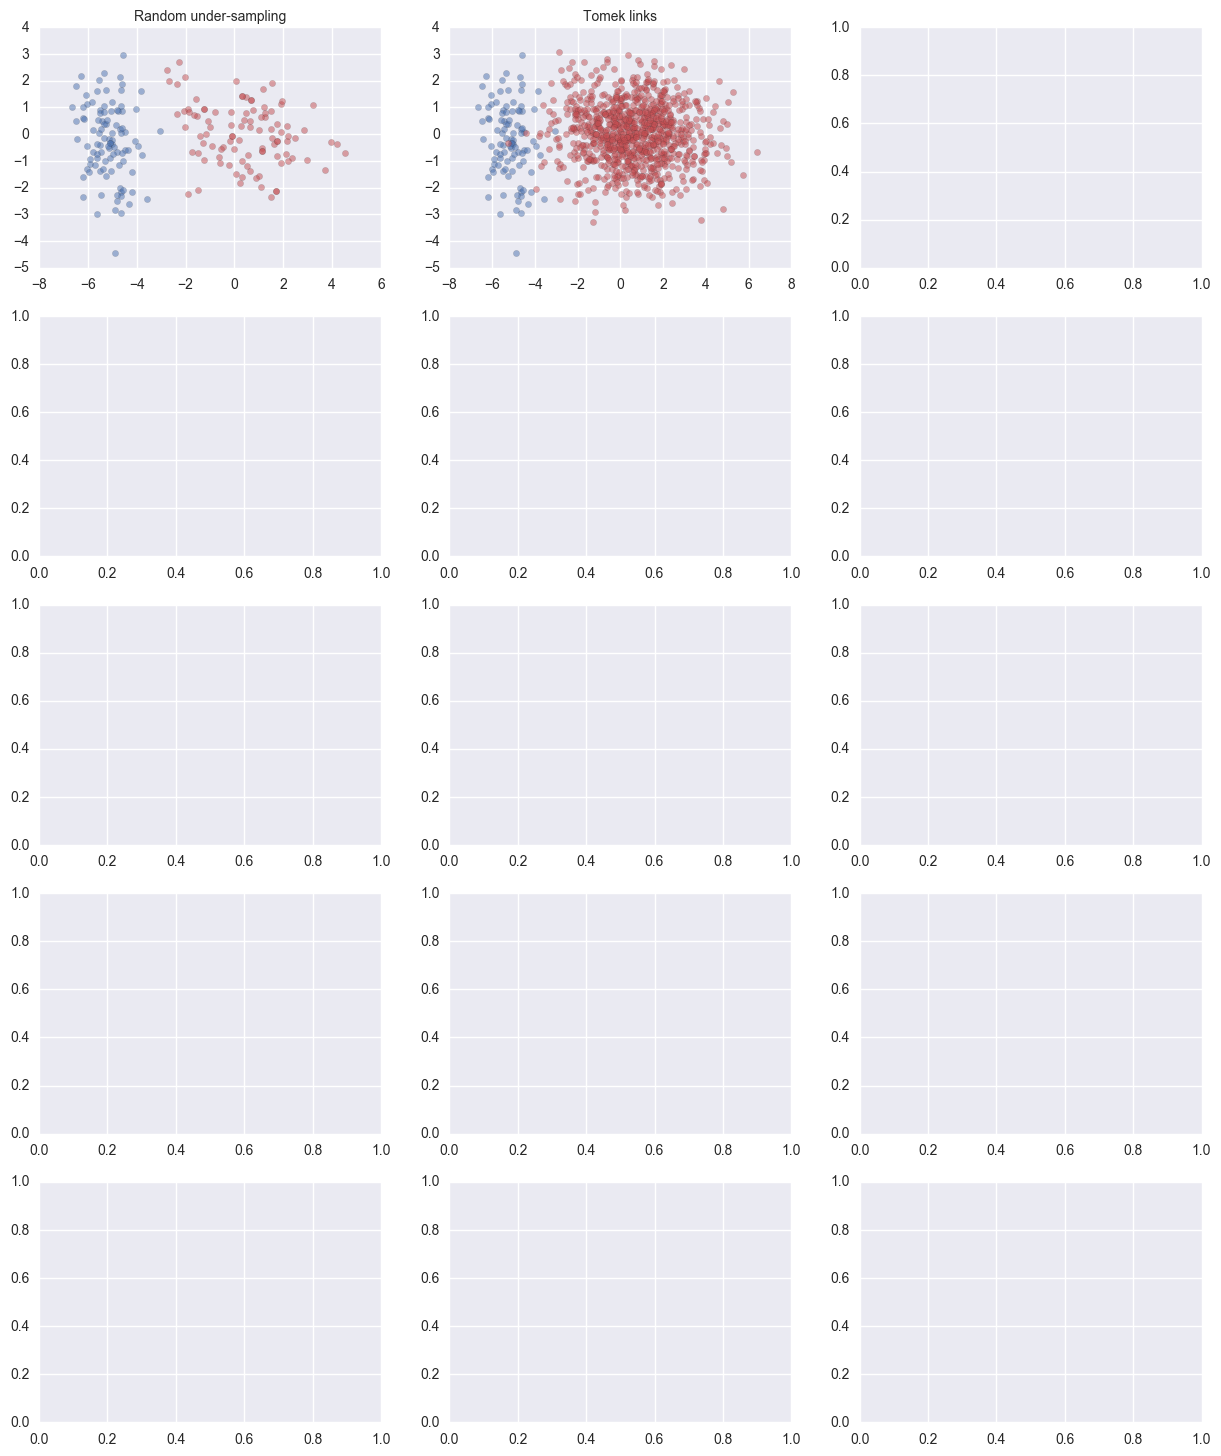

In [14]:
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,18))
# Random under-sampling
axes[0, 0].scatter(usx_vis[usy == 0, 0], usx_vis[usy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(usx_vis[usy == 1, 0], usx_vis[usy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random under-sampling', fontsize=fs)

# Tomek links
axes[0, 1].scatter(tlx_vis[tly == 0, 0], tlx_vis[tly == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(tlx_vis[tly == 1, 0], tlx_vis[tly == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('Tomek links', fontsize=fs)
plt.show()

### oversampling

In [15]:
# Generate the new dataset using under-sampling method
verbose = False
ratio = 'auto'
# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio)
osx, osy = OS.fit_sample(x, y)
# 'SMOTE'
smote = SMOTE(ratio=ratio, kind='regular')
smox, smoy = smote.fit_sample(x, y)

In [16]:
osx_vis = pca.transform(osx)
smox_vis = pca.transform(smox)

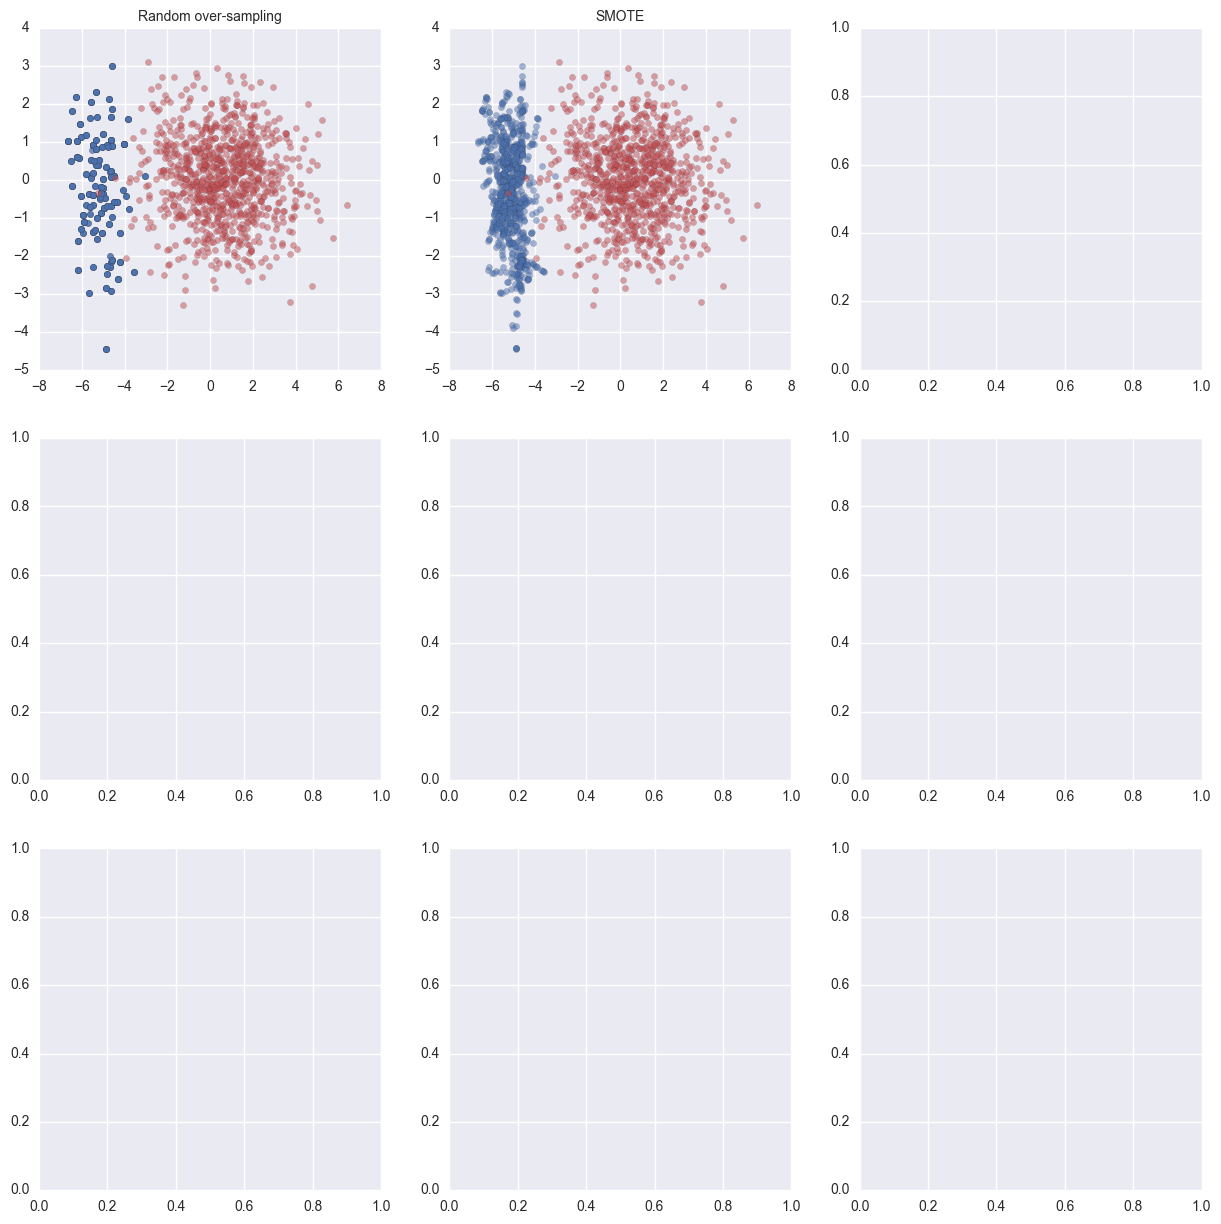

In [18]:
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# Random over-sampling
axes[0, 0].scatter(osx_vis[osy == 0, 0], osx_vis[osy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(osx_vis[osy == 1, 0], osx_vis[osy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random over-sampling', fontsize=fs)
# SMOTE
axes[0, 1].scatter(smox_vis[smoy == 0, 0], smox_vis[smoy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(smox_vis[smoy == 1, 0], smox_vis[smoy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('SMOTE', fontsize=fs)
plt.show()